# Projeto 2 de Ciência de dados:
 
 
 #### Introdução:
  Este projeto objetifica a tentativa de criação de um modelo de predição cuja variável de interesse é o Rating que um aplicativo da PlayStore recebe, de acordo com algumas caraceterísticas intrínsecas. O modelo fará isso utilizando um Dataset importado do Kaggle e um processe de regressão.
  Este projeto objetifica a criação de um modelo capaz de prever o Rating de aplicativos da Google Playstore, baseando-se em outras características, como quantidade de reviews, categoria e preço. O modelo utilizará um Dataset importado do Kaggle e será realizado um processo de regressão.
 
 #### Link do dataset:
  * https://www.kaggle.com/lava18/google-play-store-apps
 
#### Integrantes:
*  Jean Silas
*  Isabelle Moschini
*  Matheus Barros
*  Rafael Monteiro

#### Váriavel Target:
   * Ratings (0 a 5)
   
   
#### Features:
   * Category
   * Reviews
   * Installs
   * Price
   * Content Rating

# 1- Importando as bibliotecas e lendo a base de dados (dataset) :

O primeiro passo para começarmos a analisar o dataset é observar suas categorias e os tipos de elementos presentes em cada uma.

In [71]:
#Importando as Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy.stats as stats 
import sklearn 
from math import *

In [72]:
#Abrindo o Dataset
dataset = pd.read_csv('googleplaystore.csv')

#Verificando suas dimensões
print('Este dataset possui {} linhas e {} colunas'.format(dataset.shape[0],dataset.shape[1]))

Este dataset possui 10841 linhas e 13 colunas


In [73]:
#Sondando os dados
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
#Sondando os tipos de dados
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

  _Como o modelo utilizará métodos de regressão, precisaremos fazer um tratamento dos dados e priorizar pela transformação do máximo de elementos possível em numéricos._

# 2-Pré-processamento de dados:

  Após visualizar superficialmente os dados, vamos partir para a tratamento deles: vamos remover as colunas que não são interessantes a priori para a nosso modelo, remover espaços vazios e outros processos de limpeza.
  
  Nós não consideramos as colunas App, Size, Genres, Last Updated, Current Ver e Android Ver interessantes para o modelo, uma vez que 

In [6]:
data0 = dataset.drop(columns=['App', 'Size', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver','Type'])
data0.head()

,Category,Rating,Reviews,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",0,Everyone


_É importantíssimo remover as linhas que possuem valores vazios para que não ocorra nenhum problema no momento de passar os dados pelo modelo de predição._

In [7]:
#Estamos eliminando as linhas que possuem valores vazios
data0 = data0.dropna()
data0.head()

,Category,Rating,Reviews,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",0,Everyone


In [8]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9366 non-null   object 
 1   Rating          9366 non-null   float64
 2   Reviews         9366 non-null   object 
 3   Installs        9366 non-null   object 
 4   Price           9366 non-null   object 
 5   Content Rating  9366 non-null   object 
dtypes: float64(1), object(5)
memory usage: 512.2+ KB


_Uma vez retirado os valores nulos, vamos avaliar as frequências de cada variável, para assim entender como está o dataset e precisar os próximos passos de limpeza. Mas antes vamos tirar os cifões do coluna Price para e os "+" dos installs e transformar as variáveis Reviews, Installs e Price em númericas para poder aplicar as funções do Pandas_

In [9]:
# Funções para tratar as colunas numéricas:

#Definindo função que limpa
def Price_clean(valor):
    valor_str = str(valor)
    return float(valor_str.replace('$', ''))

#Definindo função que limpa e transforma em valor numérico
def Installs_clean(valor):
    valor_str = str(valor)
    return int(valor_str.replace('+', '').replace(',',''))

In [10]:
# Aplicando as funções definidas acima acima:
data0.Price = data0.Price.astype(str).map(Price_clean)
data0.Installs = data0.Installs.astype(str).map(Installs_clean)

In [11]:
# Transformando todos os valores numéricos em float
data0.Reviews = data0.Reviews.astype('float64')
data0.Installs = data0.Installs.astype('float64')
data0.Price = data0.Price.astype('float64')
data0.dtypes

Category           object
Rating            float64
Reviews           float64
Installs          float64
Price             float64
Content Rating     object
dtype: object

In [12]:
data0.Category.value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [13]:
data0['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [14]:
data0.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [15]:
data0.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [16]:
data0.Price.describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [17]:
data0.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

## 2.1- Decisões sobre o dataset:
    
   Após entendermos mais os dados decidimos tomas as seguintes decisões:
   
   * Retirar todas as linhas que possuem "Adults only 18+" como característica da feature Content Rating, uma vez que só possuem 3 linhas em que ele aparece, sendo assim, um outlier para o nosso modelo;
   
   * Retirar todas as linhas que possuem "Unrated" como característica da feature Content Rating, uma vez que só possui uma linha em que ele aparece, sendo assim, um outlier para o nosso modelo.

In [18]:
data0 = data0.loc[data0['Content Rating'] != 'Adults only 18+', :]
data0 = data0.loc[data0['Content Rating'] != 'Unrated', :]
data0['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

## 2.2- Dados tratados para fazer uma análise mais aprofundada:

   A partir desse ponto, já possuimos dados mais parecidos com o que usaremos no nosso modelo. Ess etapa inicial, consistiu em descartar dados que não são importantes para o modelo e para a análise exploratório e fazer a correção de dados necessária para a maior robustez do modelo e análise exploratória.
   
   * Váriavél Target:Rating
   * Features: Category, Reviews, Installs, Price e Content Rating.
   
   * Tipagem das features:
   
       * quantititvas: Reviews, Installs e Price.
       
       * qualitativas:  Category e Content Rating.

In [19]:
data0.head()

,Category,Rating,Reviews,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,10000.0,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,500000.0,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,50000000.0,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,100000.0,0.0,Everyone


In [20]:
data0.dtypes

Category           object
Rating            float64
Reviews           float64
Installs          float64
Price             float64
Content Rating     object
dtype: object

# 3- Analise exploratória do dataset:
   _Como o nosso dataset possui tanto variáveis qualitativas quanto quantitivas então separaremos as análises que cabem a cada tipode variável._

## 3.1 - Análise das variáveis quantitativas:

In [21]:
#Entendendo as medidas das variáveis numéricas.
data0.describe()

,Rating,Reviews,Installs,Price
count,9362.000000,9.362000e+03,9.362000e+03,9362.000000
mean,4.191733,5.142607e+05,1.790487e+07,0.961338
std,0.515285,3.144697e+06,9.125700e+07,15.819951
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.860000e+02,1.000000e+04,0.000000
50%,4.300000,5.916500e+03,5.000000e+05,0.000000
75%,4.500000,8.159625e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


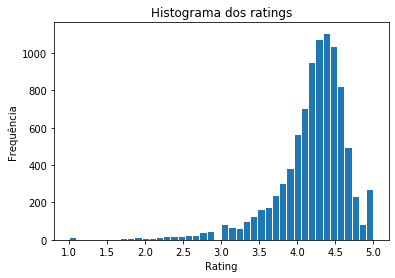

In [22]:
#Sondado a distribuição de Rating
plt.hist(data0.Rating,bins=42,edgecolor='white')
plt.title("Histograma dos ratings")
plt.xlabel("Rating")
plt.ylabel("Frequência")
plt.show()

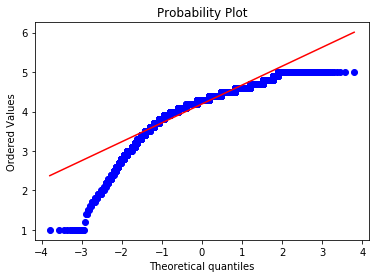

In [23]:
# O modelo aparenta ser uma distribuição normal, para isso verificaremos:
stats.probplot(data0.Rating,dist="norm",plot=plt)
plt.show()

_Com esse gráfico constatamos que a distribuição não é normal, e portanto nossa suposição estava errada_

In [24]:
data0.Rating.describe()

count    9362.000000
mean        4.191733
std         0.515285
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

_Aqui, podemos perceber que o valor de Rating mais frequente é de 4.4, seguido de suas vizinhanças. Quanto mais distante desse valor, menor é a frequência._

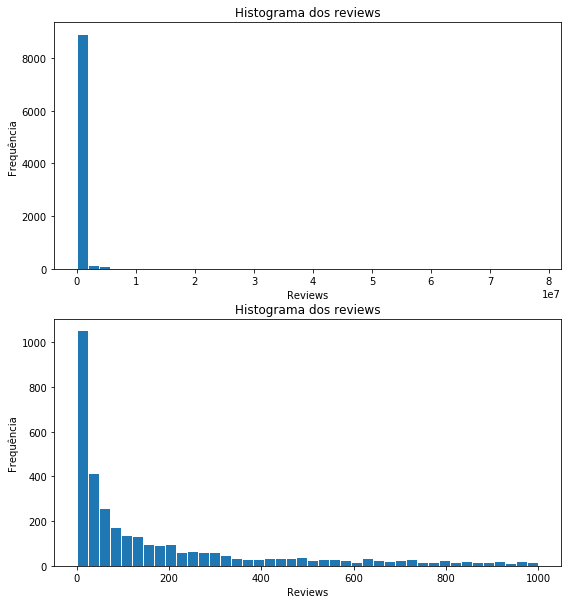

In [25]:
#Sondado a distribuição de Reviews
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.hist(data0.Reviews,bins=42,edgecolor='white')
plt.title("Histograma dos reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.subplot(223)
plt.hist(data0.Reviews,bins=42,edgecolor='white', range=[0, 1e3])
plt.title("Histograma dos reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequência")
plt.show()

_Observando o primeiro gráfico, percebemos que Review está concentrado na vizinhança de um valor. Porém, reduzindo o intervalo analisado, notamos que os valores seguem alguma distribuição. Para verificar a situação, vamos analisar frequencia numericamente_

In [26]:
#Verificando o valor 
data0.Reviews.describe()

count    9.362000e+03
mean     5.142607e+05
std      3.144697e+06
min      1.000000e+00
25%      1.860000e+02
50%      5.916500e+03
75%      8.159625e+04
max      7.815831e+07
Name: Reviews, dtype: float64

_Os reviews não estão concentrados em um valor, mas sim em um intervalo_

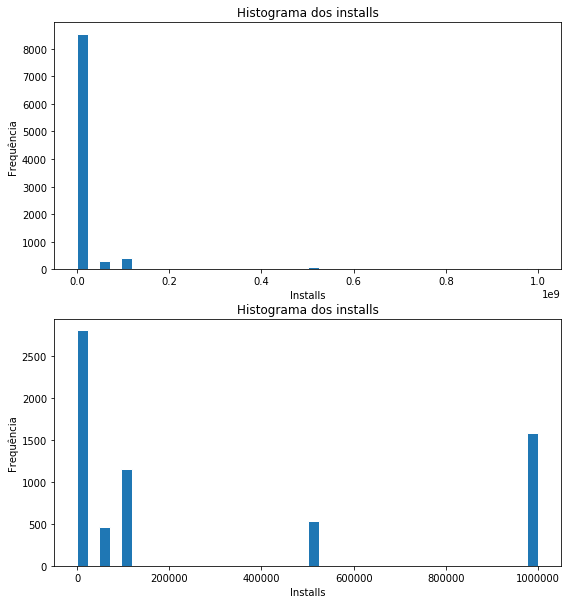

In [27]:
#Sondado a distribuição de Installs
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.hist(data0.Installs,bins=42,edgecolor='white', range=[0, 1e9])
plt.title("Histograma dos installs")
plt.xlabel("Installs")
plt.ylabel("Frequência")

plt.subplot(223)
plt.hist(data0.Installs,bins=42,edgecolor='white', range=[0, 1e6])
plt.title("Histograma dos installs")
plt.xlabel("Installs")
plt.ylabel("Frequência")
plt.show()

_Amalisando o primeiro histograma, verificamos que a variável install se concentra na vizinhança de um valor. Porém, considerando um intervalo menor dos valores (de 0 a 1 000 000), percebemos que os dados estão distribuídos de forma inconclusiva. Vamos tentar entender isso, verificando os valores numericamente_

In [28]:
#Sondando a situação
data0.Installs.describe()

count    9.362000e+03
mean     1.790487e+07
std      9.125700e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

_A quantidade de installs mais frequente dos aplicativos é da orderm de 10^3._

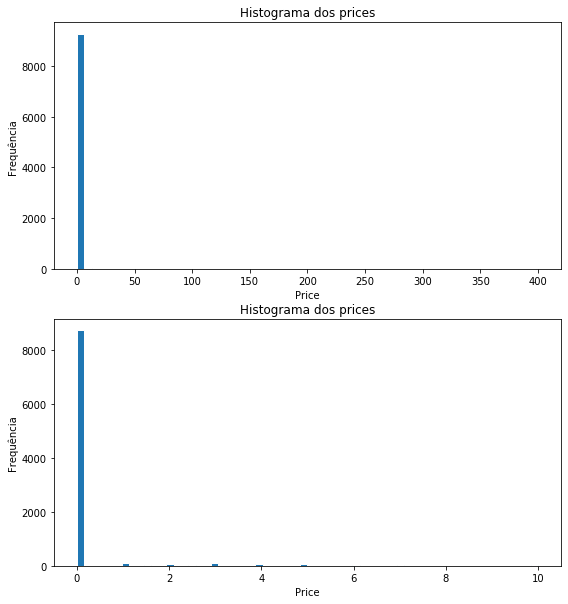

In [29]:
#Sondado a distribuição de Price
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.hist(data0.Price,bins=62,edgecolor='white')
plt.title("Histograma dos prices")
plt.xlabel("Price")
plt.ylabel("Frequência")

plt.subplot(223)
plt.hist(data0.Price,bins=62,edgecolor='white', range=[0, 10])
plt.title("Histograma dos prices")
plt.xlabel("Price")
plt.ylabel("Frequência")

plt.show()

_Assim como o Install, o Price se concentra na vizinhança de um valor, que neste caso seria o zero. Com isso, podemos supor que a grande maioria dos apps são gratuitos. Para verificar tal suposição, verificamos a frequência dessa variável numricamente_

In [30]:
#Verificando a suposiçaõ anterior:
data0.Price.describe()

count    9362.000000
mean        0.961338
std        15.819951
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [31]:
porcentagem = len(data0.loc[data0.Price==0,:])/len(data0)
print("Porcentagem de apps gratuitos é de : {}%".format(porcentagem*100))

Porcentagem de apps gratuitos é de : 93.08908352916043%


_Com isso, confirmarmos a hipótese que grande parte dos aplicativos são gratuitos, já que 93% deles são Free_

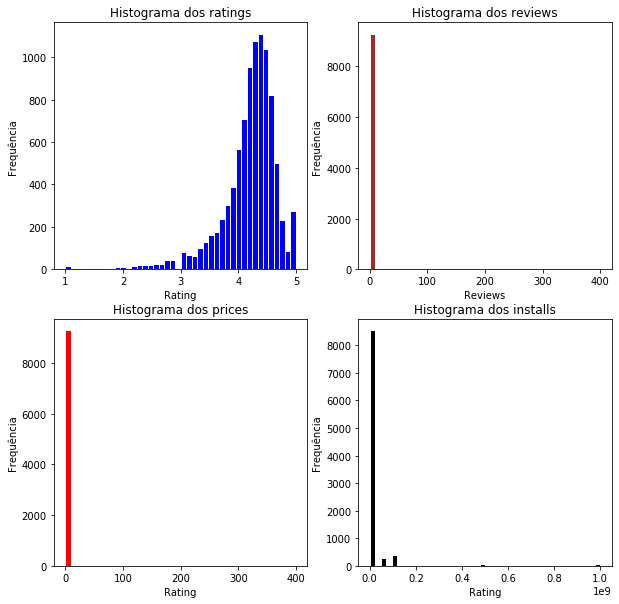

In [32]:
#Juntando os gráficos
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.hist(data0.Rating,bins=42,edgecolor='white',color='blue')
plt.title("Histograma dos ratings")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.subplot(222)
plt.hist(data0.Price,bins=42,edgecolor='white',color='brown')
plt.title("Histograma dos reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.subplot(223)
plt.hist(data0.Price,bins=42,edgecolor='white', color='red')
plt.title("Histograma dos prices")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.subplot(224)
plt.hist(data0.Installs,bins=42,edgecolor='white', color='black')
plt.title("Histograma dos installs")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.show()

## _Para entendermos ainda melhor essas 4 variáveis quantitavas, vamos plotar mais alguns gráficos:_
   _Assim podemos entender, por exemplo, a questão dos outliers._

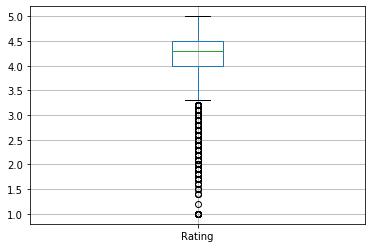

In [33]:
data0.boxplot(column='Rating');

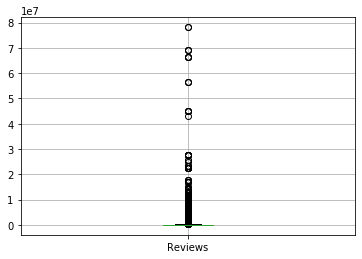

In [34]:
data0.boxplot(column='Reviews');

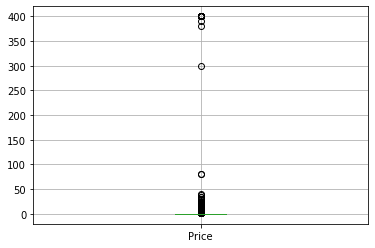

In [35]:
data0.boxplot(column='Price');

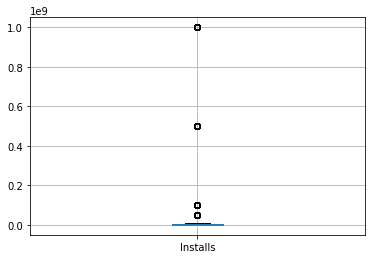

In [36]:
data0.boxplot(column='Installs');

_E para terminar a análise das variáveis quantitativas, vamos verificar a correlação entre elas:_

In [37]:
#Verificando entre as variáveis quantitativas
correl = pd.DataFrame.corr(data0)
correl

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068154,0.051368,-0.021902
Reviews,0.068154,1.000000,0.641608,-0.009824
Installs,0.051368,0.641608,1.000000,-0.011895
Price,-0.021902,-0.009824,-0.011895,1.000000


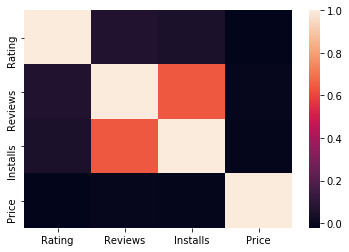

In [38]:
#Verificando entre as variáveis quantitativas gráficamente
sns.heatmap(correl);

In [39]:
data0_log = data0.copy()
data0_log['log_price'] = np.log(data0_log['Price'] + 1)
data0_log['log_installs'] = np.log(data0_log['Installs'])
data0_log['log_reviews'] = np.log(data0_log['Reviews'])
data0_log = data0_log.drop(columns=['Price', 'Installs', 'Reviews'])

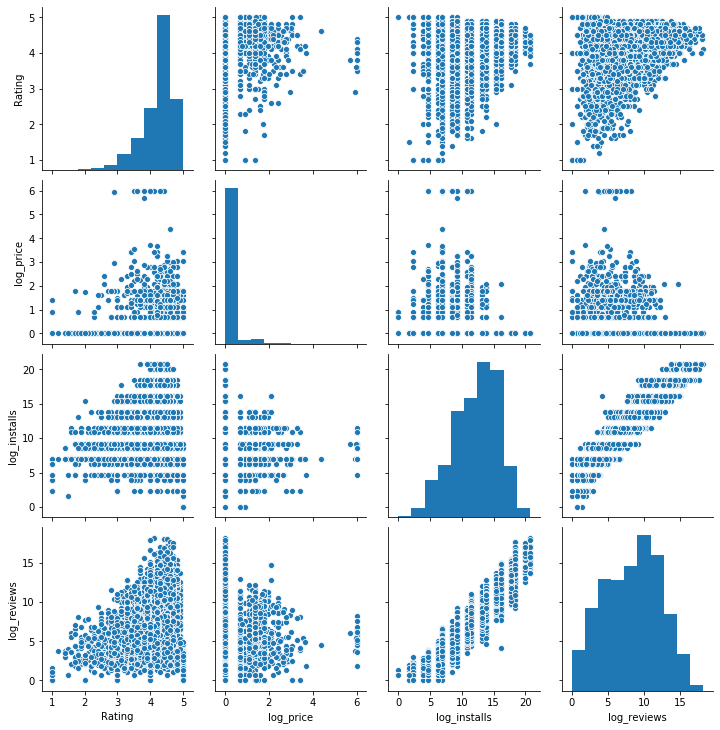

In [40]:
# Verificando Graficamente:
sns.pairplot(data0_log);

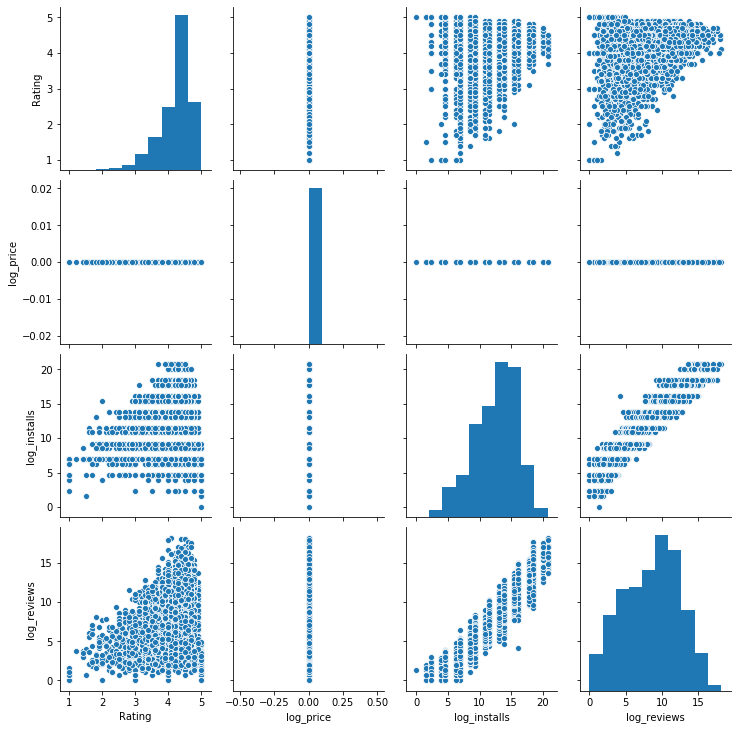

In [41]:
data0 = data0_log.loc[data0_log.log_price == 0,:]
sns.pairplot(data0);

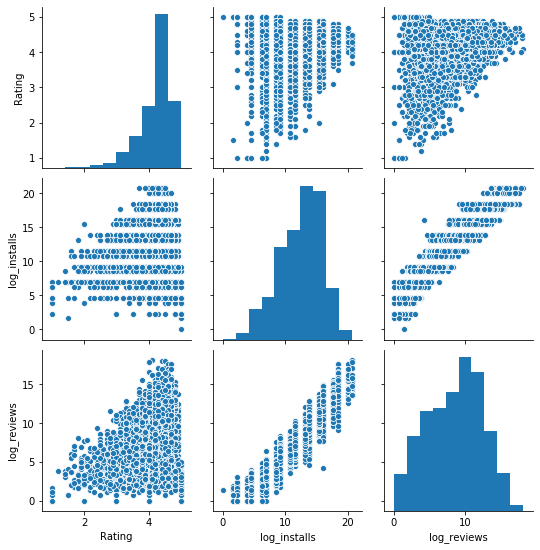

In [42]:
data0 = data0.drop(columns=['log_price'])
sns.pairplot(data0);

## 3.2- Conclusões a respeito da análise exploratória das variáveis quantitivas:

   O que se percebe é que a nossa variável target não é muito bem explicada pelas variáveis quantitaivas, o que pode ser ruim para o modelo mais a frente, já que a baixa correlação entre as features e o target pode resultar num modelo que não é eficiente e que não preve o que ele foi criado para prever. Nos resta entender como as variáveis qualitativas se correlacionam com a variável Target.

## 3.3-Análise exploratória: entendendo os dados qualitativos
   _Agora analisaremos as váriaveis qualitativas: Category e Content Rating_ 

In [43]:
#Verificando a frequência de cada classe de Category:
data0.Category.value_counts()

FAMILY                 1585
GAME                   1020
TOOLS                   670
PRODUCTIVITY            333
FINANCE                 310
COMMUNICATION           306
PHOTOGRAPHY             299
LIFESTYLE               296
SPORTS                  296
BUSINESS                292
HEALTH_AND_FITNESS      285
MEDICAL                 262
SOCIAL                  257
PERSONALIZATION         247
SHOPPING                236
NEWS_AND_MAGAZINES      231
TRAVEL_AND_LOCAL        218
DATING                  191
BOOKS_AND_REFERENCE     170
VIDEO_PLAYERS           156
EDUCATION               151
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     119
FOOD_AND_DRINK          107
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        72
WEATHER                  68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           59
COMICS                   56
PARENTING                48
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [44]:
#Verificando a frequência de cada classe de Content Rating:
data0['Content Rating'].value_counts()

Everyone        6868
Teen            1039
Mature 17+       444
Everyone 10+     364
Name: Content Rating, dtype: int64

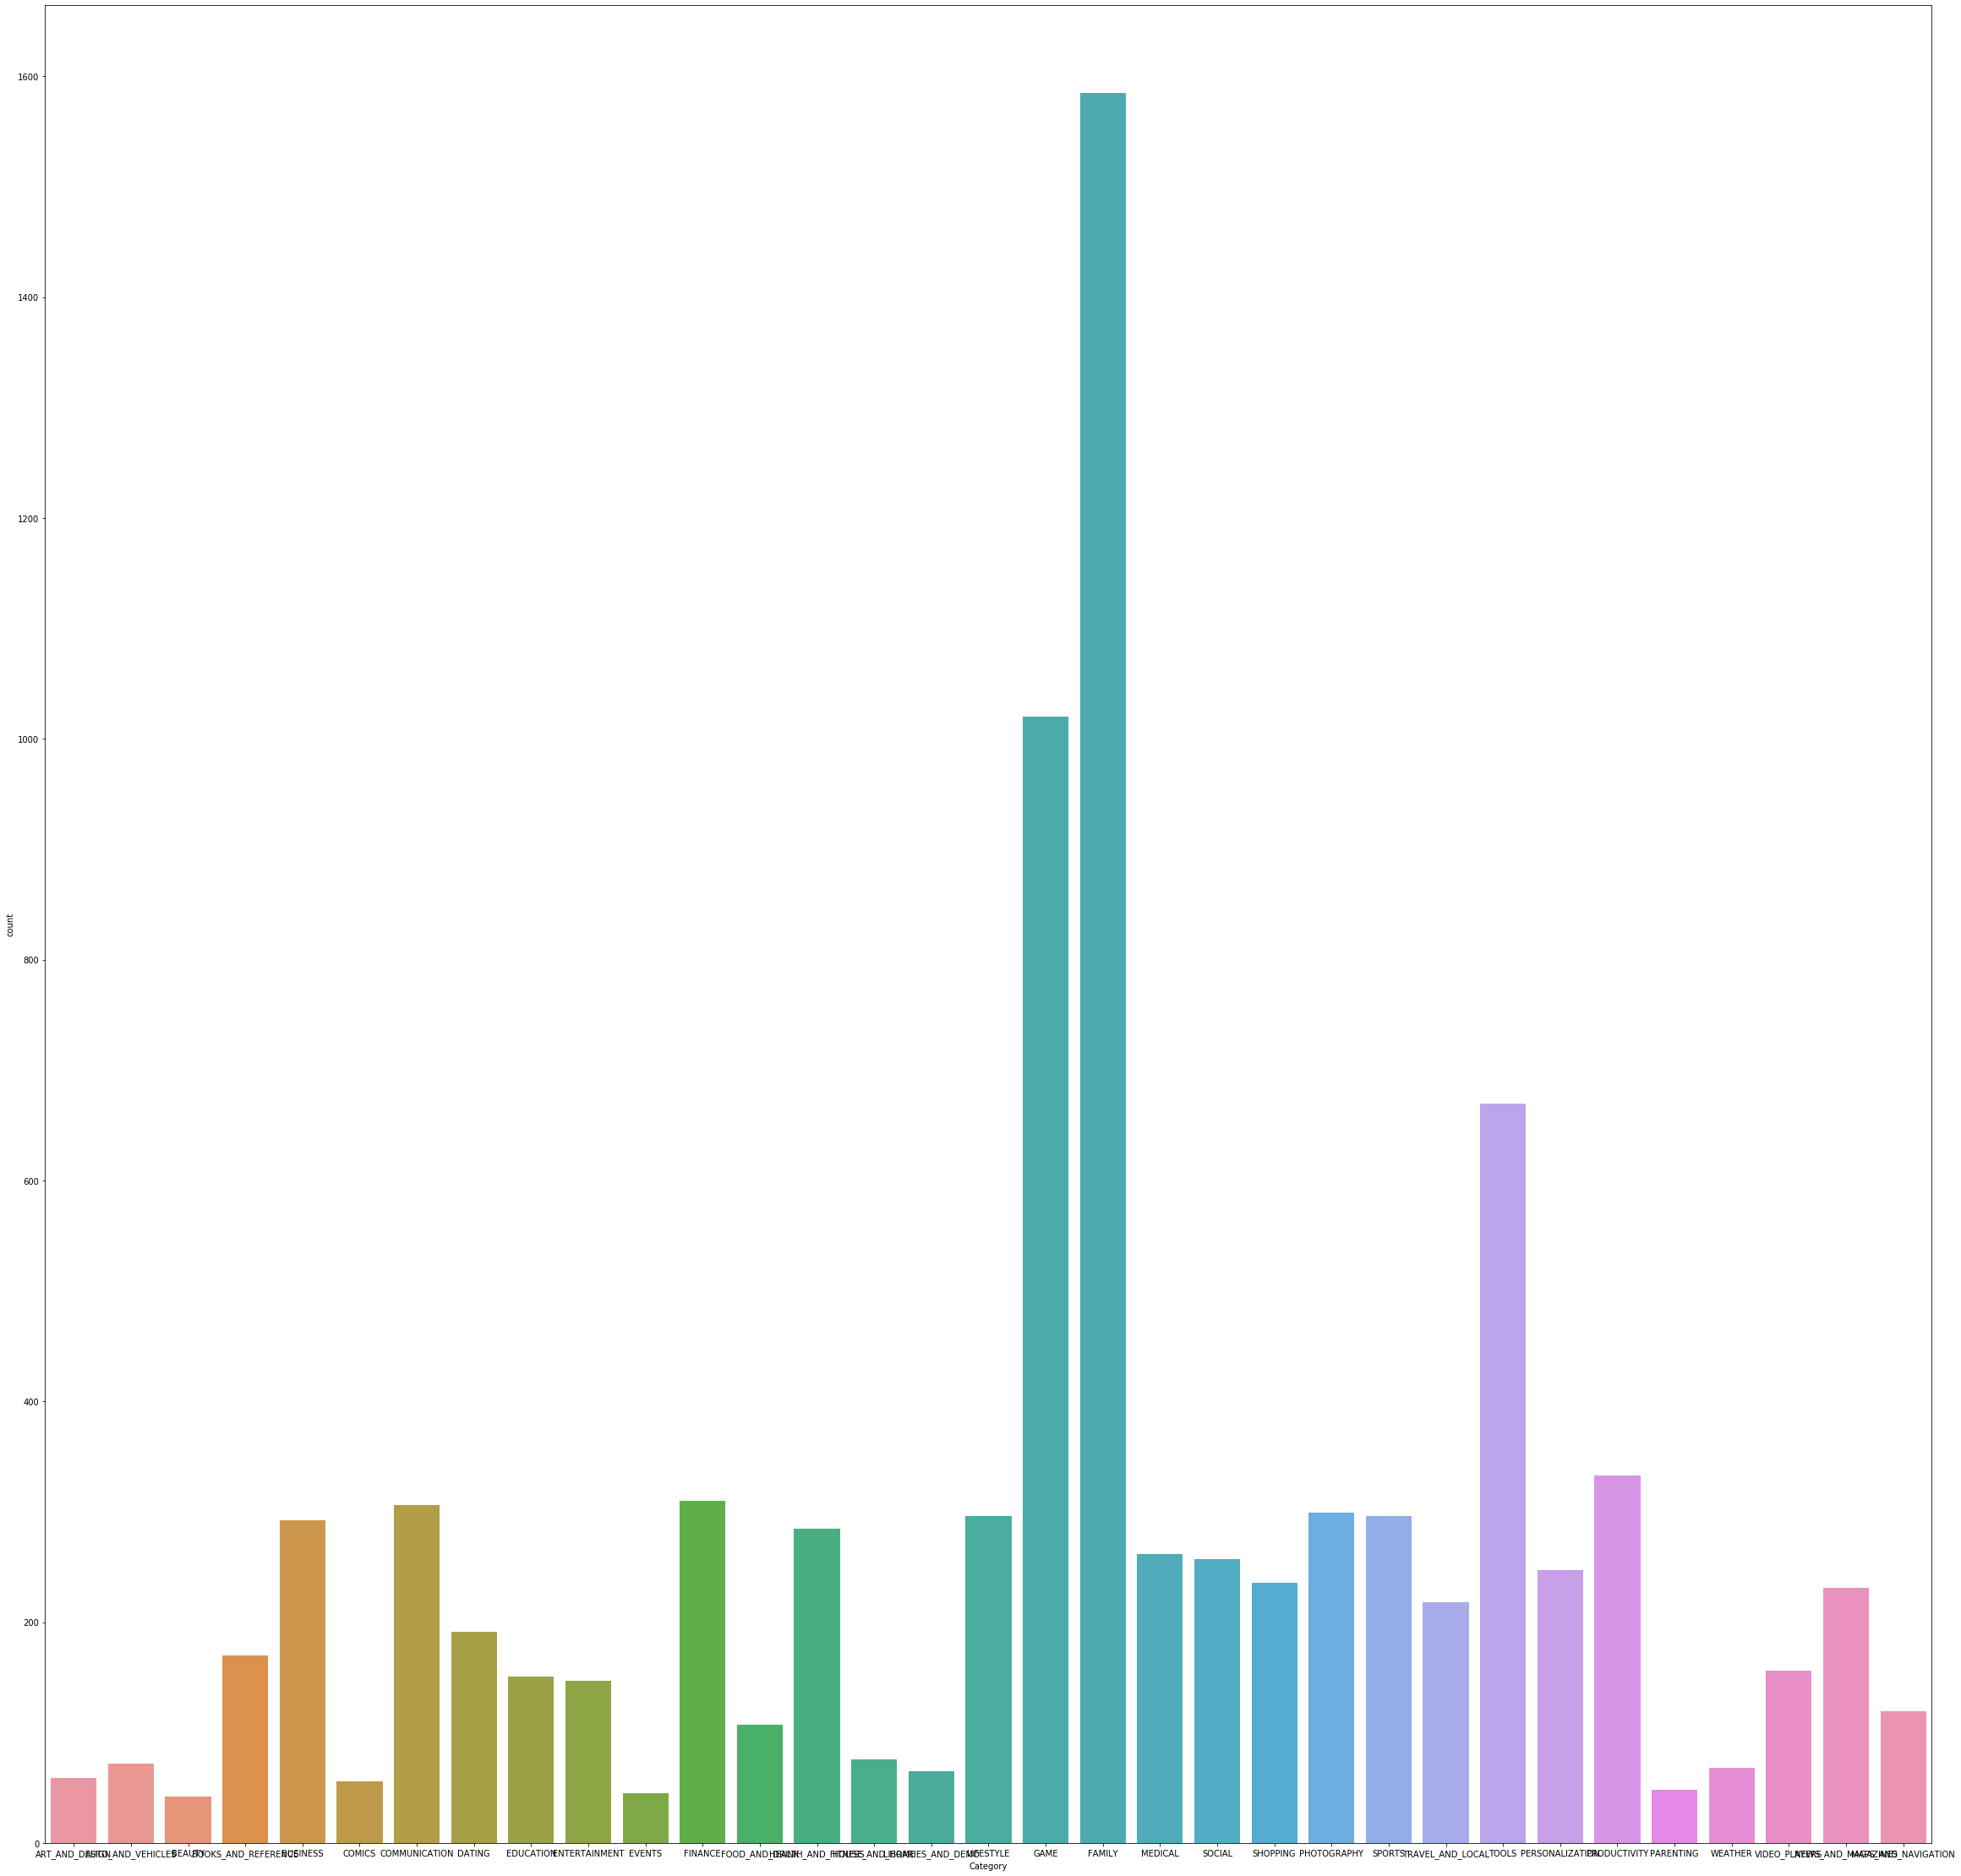

In [45]:
#Verificando a frequência de cada classe de Category graficamente
plt.figure(figsize=(40, 40))
sns.countplot(data0.Category);

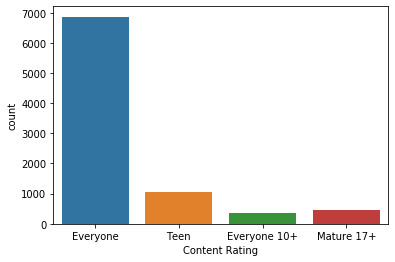

In [46]:
#Verificando a frequência de cada classe de Content Rating graficamente
sns.countplot(data0['Content Rating']);

In [47]:
#Vamos transformar as variáveis catégoricas em dummies:
df_d = pd.get_dummies(data0, columns=['Category','Content Rating','log_installs'], drop_first=True)
print('Este dataset possui {} linhas e {} colunas'.format(df_d.shape[0],df_d.shape[1]))

Este dataset possui 8715 linhas e 55 colunas


In [48]:
#vamos transformar as variáveis categóricas em quantitativas ordinais
#df_o = sklearn.preprocessing.

In [49]:
df_d.head()

,Rating,log_reviews,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,log_installs_10.819778284410283,log_installs_11.512925464970229,log_installs_13.122363377404328,log_installs_13.815510557964274,log_installs_15.424948470398375,log_installs_16.11809565095832,log_installs_17.72753356339242,log_installs_18.420680743952367,log_installs_20.030118656386467,log_installs_20.72326583694641
0,4.1,5.068904,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4.7,11.379508,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.5,12.281384,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.3,6.874198,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
import statsmodels.api as sm

# Regressão Linear

O primeiro processo de regressão pelo qual nosso dataset irá passar é o de regressão linear (linear regression).

In [51]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [52]:
train_ = df_d.loc[:7800,:]
test = df_d.loc[7801:,:]

In [53]:
Y = train_['Rating']
X = train_.drop(columns=['Rating'])
Ytest = test['Rating']
Xtest = test.drop(columns=['Rating'])

In [54]:
results = regress(Y,X)

pre = results.predict(test)

In [55]:
coefb = results.params

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     28.12
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          9.27e-251
Time:                        21:37:57   Log-Likelihood:                -3723.4
No. Observations:                6485   AIC:                             7557.
Df Residuals:                    6430   BIC:                             7930.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               5.0505      0.436     11.574      0.000       4.195       5.906
log_reviews                         0.1446      0.006     26.074      0.000       0.134       0.156
Category_AUTO_AND_VEHICLES         -0.0769      0.080     -0.966      0.334      -0.233       0.079
Category_BEAUTY                    -0.0190      0.090     -0.211      0.833      -0.196       0.158
Category_BOOKS_AND_REFERENCE       -0.0368      0.070     -0.524      0.600      -0.174       0.101
Category_BUSINESS                  -0.2491      0.066     -3.776      0.000      -0.378      -0.120
Category_COMICS                    -0.2556      0.084     -3.040      0.002      -0.420      -0.091
Category_COMMUNICATION             -0.3792      0.065     -5.871      0.000      -0.506      -0.253
Category_DATING                    -0.4262      0.072     -5.944      0.000      -0.567      -0.286
Category_EDUCATION                 -0.1343      0.068     -1.978      0.048      -0.267      -0.001
Category_ENTERTAINMENT             -0.3894      0.069     -5.624      0.000      -0.525      -0.254
Category_EVENTS                    -0.0197      0.090     -0.220      0.826      -0.195       0.156
Category_FAMILY                    -0.2466      0.060     -4.143      0.000      -0.363      -0.130
Category_FINANCE                   -0.2937      0.065     -4.507      0.000      -0.421      -0.166
Category_FOOD_AND_DRINK            -0.2901      0.074     -3.937      0.000      -0.435      -0.146
Category_GAME                      -0.2787      0.061     -4.591      0.000      -0.398      -0.160
Category_HEALTH_AND_FITNESS        -0.2409      0.064     -3.774      0.000      -0.366      -0.116
Category_HOUSE_AND_HOME            -0.2210      0.077     -2.858      0.004      -0.373      -0.069
Category_LIBRARIES_AND_DEMO        -0.1624      0.080     -2.031      0.042      -0.319      -0.006
Category_LIFESTYLE                 -0.3659      0.065     -5.670      0.000      -0.492      -0.239
Category_MAPS_AND_NAVIGATION       -0.3561      0.075     -4.776      0.000      -0.502      -0.210
Category_MEDICAL                   -0.2510      0.065     -3.872      0.000      -0.378      -0.124
Category_NEWS_AND_MAGAZINES        -0.3099      0.068     -4.547      0.000      -0.443      -0.176
Category_PARENTING                  0.0322      0.086      0.374      0.708      -0.136       0.201
Category_PERSONALIZATION           -0.1280      0.066     -1.950      0.051      -0.257       0.001
Category_PHOTOGRAPHY               -0.2883      0.065     -4.455      0.000      -0.415      -0.161
Category_PRODUCTIVITY              -0.2671      0.065     -4.124      0.000      -0.394      -0.140
Category_SHOPPING                  -0.2516      0.065     -3.841      0.000      -0

Para tirar alguma conclusão sobre a eficácea desse modelo, optamos por observar o valor de 'R-Squared', que representa um valor entre 0 e 1, sendo melhor quanto mais próximo do valor máximo. No caso do nosso modelo, esse valor é de 0.191, o que é baixo. 

Portanto, podemos concluir que a regressão linear não é o melho método para tentar prever o Rating dos aplicativos baseado no dataset utilizado. Assim, optamos por utilizar outro método de regressão, o Random Forest.

In [57]:
#plt.plot(pre, color='black')
#plt.title("Resultado Predict Linear Regression")
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.show()

# Random Forest

Random forest é uma técnica usada em machine learning, pode ser aplicada tanto em regrassão quanto classificação, no nosso caso usamos regressão por se tratar de um modelo quantitativo.

A aplicação da técnica é similar à um processo de decisão em conjunto em que o dataset é percorrido por diferentes caminhos resultando em um valor por àrvore, posteriormente sendo combinadas múltiplas árvores de decisão e tirado a média entre elas a fim de ter um resultado fiel ao dataset analisado.

É recomendado que os valores analisados não sejam inviesados, caso os tenha é muito provável que a análise retornara um valor promissor no entanto por ser ilusório pois as árvores acabaram tomando o mesmo caminho diversas vezes devido à maior concentração em um determinado valor.

Tomamos certas precauções para que os valores do dataset sejam realocados nas árvores de maneira eficiente e que o resultado seja mais próximo da realidade, seguindo essa linha definimos a quantidade de estimadores à aproximadamente 100 que não é um valor exacerbado, utilizamos logaritmo para os valores de review e installs, e limitamos a análise para apenas os aplicativos gratuitos, para melhor compreensão e análise.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression

In [59]:
#Plotando o modelo por Random Forest
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)

model.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
#Criando a variável que prevê o valor do Rating, baseando-se nas demais características do teste
Ypred = model.predict(Xtest)

Para verificar a performance de nosso modelo com Random Forest, usamos a função .score(). Primeiro, comparamos o valor previsto pelo modelo com o esperado pelo conjunto de treino, usando X e Y de treino.

In [61]:
model.score(X, Y)

0.8336071059569183

Então, usamos o score() novamente, dessa vez para comparar o valor previsto pelo modelo com o esperado, no conjunto de testes.

In [62]:
model.score(Xtest, Ytest)

-0.0567461808577554

Na função .score(), quanto mais próximo de 1 o resultado, mais eficiente é o modelo dado o dataset utilizado. No primeiro caso, o valor está relativamente próximo de 1.0, porém, no segundo, está bem distante (inclusive, é negativo).

Essa enorme diferença revela, portanto, que o modelo tem um problema de Overfitting. Ou seja, ele é capaz de prever valores bem próximos aos reais utilizando dados do treino, porém é incapaz de fazer boas previsões com valores nunca antes vistos, que é o caso do teste.

A fim de verificar a eficiência desse modelo na predição, utilizamos outros métodos, como o R Squares, que também foi utilizado na Regressão linear:

In [63]:
rmse = (sklearn.metrics.mean_squared_error(Ytest, Ypred))**(1/2)
rmse

0.611535165789259

Essa verificação aponta que o modelo não está tão ruim quanto a verificação anterior. Afinal, o valor apontado é de mais de 0.6 sendo que o maior possível é 1.0, sendo esse o melhor.

## o que são resíduos??

In [64]:
residuos = Ytest - Ypred

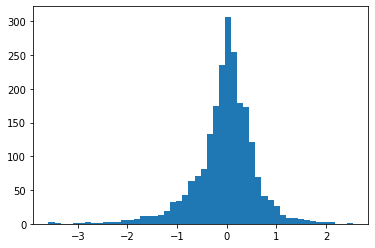

In [65]:
plt.hist(residuos, bins=50);

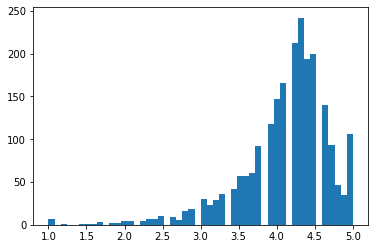

In [66]:
plt.hist(Ytest, bins=50);

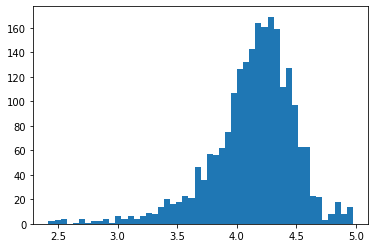

In [67]:
plt.hist(Ypred, bins=50);

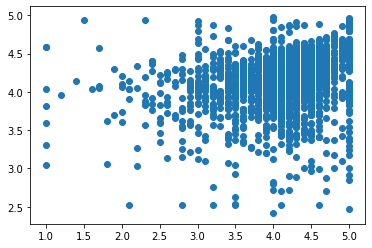

In [68]:
plt.scatter(Ytest, Ypred)

In [69]:
from sklearn.metrics import r2_score
r2_score(Ytest, Ypred)

-0.0567461808577554

# Conclusão